# Project 5 - Linear Regression - Diamonds

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing

## 1. Checking out Diamond dataset

In [21]:
diamond = pd.read_csv('diamonds.csv')
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [19]:
diamond.shape

(48940, 10)

In [22]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
carat      48940 non-null float64
cut        48940 non-null object
color      48940 non-null object
clarity    48940 non-null object
depth      48940 non-null float64
table      48940 non-null float64
price      48940 non-null int64
x          48940 non-null float64
y          48940 non-null float64
z          48940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


In [18]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [24]:
diamond['cut'].value_counts()

Ideal        19608
Premium      12507
Very Good    10922
Good          4443
Fair          1460
Name: cut, dtype: int64

In [26]:
diamond['color'].value_counts()

G    10287
E     8869
F     8653
H     7542
D     6160
I     4889
J     2540
Name: color, dtype: int64

In [27]:
diamond['clarity'].value_counts()

SI1     11832
VS2     11125
SI2      8307
VS1      7449
VVS2     4635
VVS1     3321
IF       1613
I1        658
Name: clarity, dtype: int64

In [ ]:
Carat, Clarity, Cut, Color

### Price's mean

In [11]:
diamond['price'].mean()

3934.409644462607

In [38]:
# add mean price column
diamond['price_predicted'] = diamond['price'].mean()
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_predicted
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3934.409644
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3934.409644
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3934.409644
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3934.409644
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3934.409644


### Checking out Rick's diamond dataset 

In [28]:
rick = pd.read_csv('Rick_diamonds.csv')
rick.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


### Adding price_predicted column 

In [29]:
rick['price_predicted'] = diamond['price'].mean()
rick.head()

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3934.409644
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,3934.409644
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,3934.409644
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,3934.409644
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,3934.409644


### Exporting draft table

In [34]:
rick.to_csv('project_5_draft_table.csv', index=False)

## 2. Baseline R2 and Root mean

In [39]:
rmse = np.sqrt(mean_squared_error(diamond['price'], diamond['price_predicted']))


In [41]:
R2 = r2_score(diamond['price'], diamond['price_predicted'])

In [42]:
rmse, R2

(3989.293102899151, 0.0)

## 3. Data Cleaning (Diamond table)

In [43]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_predicted
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3934.409644
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3934.409644
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3934.409644
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3934.409644
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3934.409644


In [44]:
diamond.shape

(48940, 11)

In [45]:
diamond.isnull().sum()

carat              0
cut                0
color              0
clarity            0
depth              0
table              0
price              0
x                  0
y                  0
z                  0
price_predicted    0
dtype: int64

#### 3.1 Replacing cut, color and clarity by number scores

In [48]:
diamond['clarity'].unique()

array(['SI1', 'VS1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

Clarity's scores from 1 to 8

I1 = 1, 
SI2 = 2, 
SI1 = 3, 
VS2 = 4, 
VS1 = 5, 
VVS2 = 6,
VVS1 = 7, 
IF = 8



In [65]:
diamond1 = diamond.replace({'I1': 1, 'SI2' : 2, 'SI1' : 3, 'VS2' : 4, 'VS1' : 5, 'VVS2' : 6, 'VVS1' : 7, 'IF' : 8})

In [49]:
diamond['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

Color's scores from 1 to 7

D = 7,
E = 6,
F = 5,
G = 4,
H = 3,
I = 2,
J = 1,

In [67]:
diamond2 = diamond1.replace({'J': 1, 'I' : 2, 'H' : 3, 'G' : 4, 'F' : 5, 'E' : 6, 'D' : 7})

In [46]:
diamond['cut'].unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

Cut's scores from 1 to 6

Ideal = 5,
Premium = 4,
Very Good = 3,
Good = 2,
Fair = 1,

In [76]:
diamond_review = diamond2.replace({'Ideal' : 5, 'Premium' : 4, 'Very Good' : 3, 'Good' : 2, 'Fair' : 1})
diamond_review

,carat,cut,color,clarity,depth,table,price,x,y,z,price_predicted
0,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31,3934.409644
1,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31,3934.409644
2,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,3934.409644
3,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,3934.409644
4,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48,3934.409644
...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,4,7,3,62.7,59.0,2757,5.69,5.73,3.58,3934.409644
48936,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50,3934.409644
48937,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61,3934.409644
48938,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56,3934.409644


In [77]:
diamond_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 11 columns):
carat              48940 non-null float64
cut                48940 non-null int64
color              48940 non-null int64
clarity            48940 non-null int64
depth              48940 non-null float64
table              48940 non-null float64
price              48940 non-null int64
x                  48940 non-null float64
y                  48940 non-null float64
z                  48940 non-null float64
price_predicted    48940 non-null float64
dtypes: float64(7), int64(4)
memory usage: 4.1 MB


In [78]:
diamond_review.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_predicted
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,4.894000e+04
mean,0.797817,3.906416,4.407254,4.055456,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648,3.934410e+03
std,0.474126,1.116568,1.699858,1.645542,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817,8.913139e-11
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,3.934410e+03
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,3.934410e+03
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,3.934410e+03
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000,3.934410e+03
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,3.934410e+03


### Analysing features that most affect on price

In [93]:
diamond_groupby = diamond_review.groupby(['price'])[['cut','color','clarity','carat']].mean()
diamond_groupby

,cut,color,clarity,carat
price,,,,
326,4.0,6.0,3.0,0.21
327,2.0,6.0,5.0,0.23
334,4.0,2.0,4.0,0.29
335,2.0,1.0,2.0,0.31
336,3.0,1.5,6.5,0.24
...,...,...,...,...
18803,3.0,3.0,3.0,2.00
18804,5.0,4.0,2.0,2.07
18806,5.0,4.0,8.0,1.51


Mean scores:

carat = 0.8

cut = 3.9 (Very Good)

color = 4.41 (VSII)

clarity = 4.05 (VS2)

price: outliers highly affect the price (high std) 

#### 3.2 Cleaning Rick's table

In [102]:
rick.head()

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3934.409644
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,3934.409644
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,3934.409644
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,3934.409644
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,3934.409644


In [106]:
rick1 = rick.replace({'I1': 1, 'SI2' : 2, 'SI1' : 3, 'VS2' : 4, 'VS1' : 5, 'VVS2' : 6, 'VVS1' : 7, 'IF' : 8})
rick2 = rick1.replace({'J': 1, 'I' : 2, 'H' : 3, 'G' : 4, 'F' : 5, 'E' : 6, 'D' : 7})
rick_review = rick2.replace({'Ideal' : 5, 'Premium' : 4, 'Very Good' : 3, 'Good' : 2, 'Fair' : 1})
rick_review

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,3,3,2,63.4,57.0,6.10,6.18,3.89,3934.409644
1,0.38,2,5,4,60.3,61.0,4.68,4.71,2.83,3934.409644
2,0.52,5,3,4,61.8,56.0,5.19,5.16,3.20,3934.409644
3,1.10,5,4,5,61.3,56.0,6.65,6.69,4.09,3934.409644
4,2.28,5,4,2,61.6,57.0,8.44,8.37,5.18,3934.409644
...,...,...,...,...,...,...,...,...,...,...
4995,0.30,3,7,2,62.2,59.0,4.25,4.30,2.66,3934.409644
4996,0.51,5,5,6,61.9,56.0,5.09,5.14,3.16,3934.409644
4997,1.01,3,5,3,60.6,60.0,6.37,6.43,3.88,3934.409644
4998,0.31,5,5,7,62.1,56.0,4.35,4.38,2.71,3934.409644


## 4. EDA

### Price prediction: Price x cut, clarity, carat, color

In [ ]:
#rmse = np.sqrt(mean_squared_error(diamond['price'], diamond['price_predicted']))
#R2 = r2_score(diamond['price'], diamond['price_predicted'])

In [138]:
model = LinearRegression(normalize=True)

X = diamond_review[['cut','clarity','carat','color','depth','table','x','y','z']]
y = diamond_review['price']

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [139]:
y_observed = diamond_review['price']
y_predicted = model.predict(diamond_review[['cut','clarity','carat','color','depth','table','x','y','z']])

In [140]:
model.score(X,y)

0.907869075931077

### Limit price = 20000 and price min

In [146]:
diamond_review.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_predicted
0,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31,326.0
1,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31,326.0
2,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,326.0
3,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,326.0
4,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48,326.0


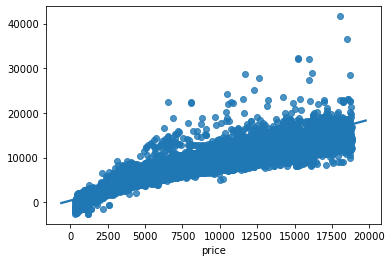

In [147]:
sns.regplot(diamond_review['price'], y_predicted)

## Predicting Rick's diamonds

In [155]:
rick_review['price_predicted'] = model.predict(rick_review[['cut','clarity','carat','color','depth','table','x','y','z']])

In [ ]:
#rick_review.loc[diamond_review['price_predicted']>= 20000, 'price_predicted'] = diamond_review.price.max()
#rick_review.loc[diamond_review['price_predicted']< diamond_review['price'].min(), 'price_predicted'] = diamond_review.price.min()

In [156]:
rick_review

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,3,3,2,63.4,57.0,6.10,6.18,3.89,3109.119038
1,0.38,2,5,4,60.3,61.0,4.68,4.71,2.83,302.781636
2,0.52,5,3,4,61.8,56.0,5.19,5.16,3.20,1090.429022
3,1.10,5,4,5,61.3,56.0,6.65,6.69,4.09,6944.243982
4,2.28,5,4,2,61.6,57.0,8.44,8.37,5.18,16556.595766
...,...,...,...,...,...,...,...,...,...,...
4995,0.30,3,7,2,62.2,59.0,4.25,4.30,2.66,-525.391618
4996,0.51,5,5,6,61.9,56.0,5.09,5.14,3.16,2710.330565
4997,1.01,3,5,3,60.6,60.0,6.37,6.43,3.88,5252.165987
4998,0.31,5,5,7,62.1,56.0,4.35,4.38,2.71,1678.771809


In [113]:
rick_review.to_csv('Rick_diamond_final_delivery.csv')

In [114]:
pd.read_csv('Rick_diamond_final_delivery.csv')

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0,0.91,3,3,2,63.4,57.0,6.10,6.18,3.89,3253.305387
1,1,0.38,2,5,4,60.3,61.0,4.68,4.71,2.83,127.839496
2,2,0.52,5,3,4,61.8,56.0,5.19,5.16,3.20,1183.864329
3,3,1.10,5,4,5,61.3,56.0,6.65,6.69,4.09,7123.648903
4,4,2.28,5,4,2,61.6,57.0,8.44,8.37,5.18,15921.448928
...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,0.30,3,7,2,62.2,59.0,4.25,4.30,2.66,-827.585691
4996,4996,0.51,5,5,6,61.9,56.0,5.09,5.14,3.16,2782.737162
4997,4997,1.01,3,5,3,60.6,60.0,6.37,6.43,3.88,5295.150915
4998,4998,0.31,5,5,7,62.1,56.0,4.35,4.38,2.71,1548.941673


In [160]:
diamond_review.loc[diamond_review['price_predicted']>= 20000, 'price_predicted'] = diamond_review.price.max()
diamond_review.loc[diamond_review['price_predicted']< diamond_review['price'].min(), 'price_predicted'] = diamond_review.price.min()

In [167]:
rick_review['price_predicted'] = model.predict(rick_review[['cut','clarity','carat','color','depth','table','x','y','z']])

In [168]:
rick_review.loc[rick_review['price_predicted']>= 20000, 'price_predicted'] = diamond_review.price.max()
rick_review.loc[rick_review['price_predicted']< diamond_review['price'].min(), 'price_predicted'] = diamond_review.price.min()

In [165]:
rmse = np.sqrt(mean_squared_error(diamond_review['price'], diamond_review['price_predicted']))
R2 = r2_score(diamond_review['price'], diamond_review['price_predicted'])
print(rmse, R2)

1122.9791322219855 0.9207587204259603


In [169]:
rick_review

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,3,3,2,63.4,57.0,6.10,6.18,3.89,3109.119038
1,0.38,2,5,4,60.3,61.0,4.68,4.71,2.83,326.000000
2,0.52,5,3,4,61.8,56.0,5.19,5.16,3.20,1090.429022
3,1.10,5,4,5,61.3,56.0,6.65,6.69,4.09,6944.243982
4,2.28,5,4,2,61.6,57.0,8.44,8.37,5.18,16556.595766
...,...,...,...,...,...,...,...,...,...,...
4995,0.30,3,7,2,62.2,59.0,4.25,4.30,2.66,326.000000
4996,0.51,5,5,6,61.9,56.0,5.09,5.14,3.16,2710.330565
4997,1.01,3,5,3,60.6,60.0,6.37,6.43,3.88,5252.165987
4998,0.31,5,5,7,62.1,56.0,4.35,4.38,2.71,1678.771809


In [166]:
rick_review.to_csv('Rick_diamond_final_delivery(v2).csv')